# 突触

In [1]:
from brian2 import *
%matplotlib inline

INFO       Cache size for target 'cython': 1187274381 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the 'C:\Users\kyle\.cython\brian_extensions' directory. [brian2]


## 最简单的突触
- ### 它会在尖峰之后引起变量的瞬时变化

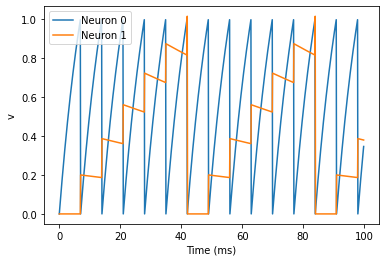

In [2]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''


G = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0', method='exact')
# 神经元 0 具有I=2并且tau=10*ms这意味着它被驱动以相当高的速率反复尖峰
# 神经元 1 有 I=0，tau=100*ms这意味着若没有突触，它根本不会发生尖峰（驱动电流 I 为 0）
G.I = [2, 0]
G.tau = [10, 100]*ms

# Comment these two lines out to see what happens without Synapses
#创建突触
#on_pre='v_post += 0.2'：当源神经元发射一个尖峰时，目标神经元的值将增加 0.2
S = Synapses(G, G, on_pre='v_post += 0.2')   # 定义突触
S.connect(i=0, j=1)   # 创建了一个从神经元 0 到神经元 1 的突触

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend();

### 注释创建突触的代码后

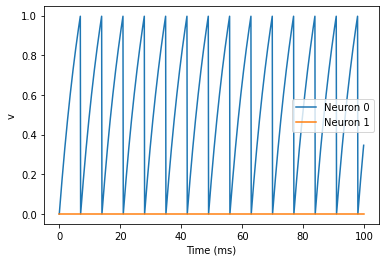

In [3]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0]
G.tau = [10, 100]*ms

# Comment these two lines out to see what happens without Synapses
#S = Synapses(G, G, on_pre='v_post += 0.2')
#S.connect(i=0, j=1)

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend();

## 添加权重
- ### 在上一节中，我们将突触的权重硬编码为值 0.2，但通常我们会允许不同突触的权重不同。我们通过引入突触方程来做到这一点

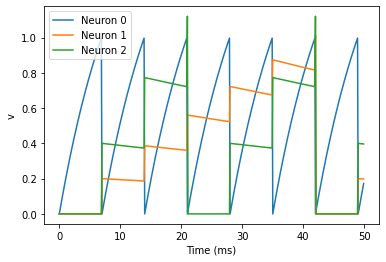

In [4]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

# Comment these two lines out to see what happens without Synapses
#突触权重变量w
S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*0.2'   #设置权重

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend();

## 引入延迟
- ### 突触传递信号时， 会有延迟

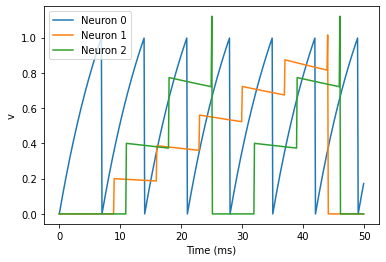

In [5]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*0.2'
S.delay = 'j*2*ms'    #延迟

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend();

## 更为复杂的连接
- ### 上面我们明确指定了神经元之间的连接，但对于较大的网络，这是难以实现的.通常需要指定一些规则来来指导神经元之间的连接

In [6]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')
S = Synapses(G, G)
S.connect(condition='i!=j', p=0.2)   #只要条件'i!=j'与概率p=0.2 成立


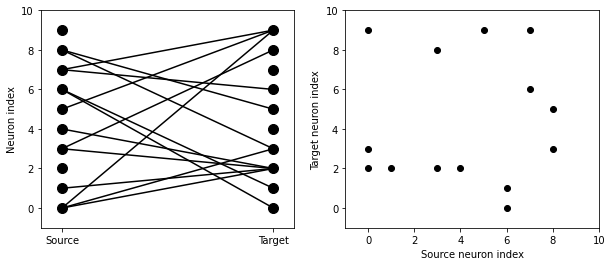

In [7]:
# 对神经网络之间的连通性进行可视化
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(S)

### 当改变连接的概率时,这些数字是如何变化的

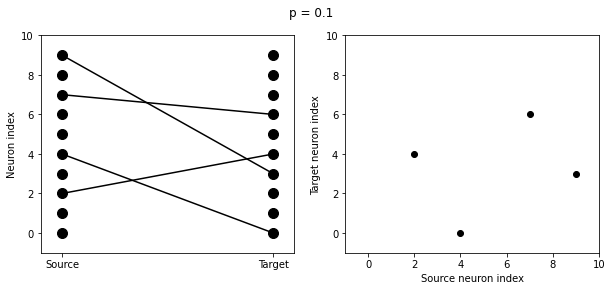

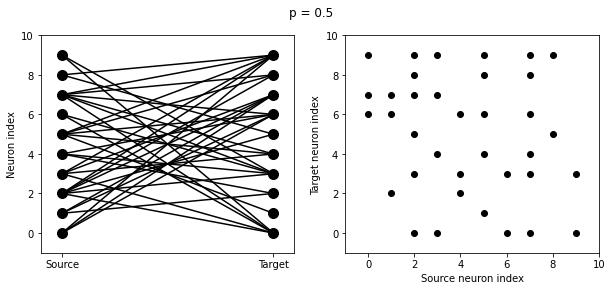

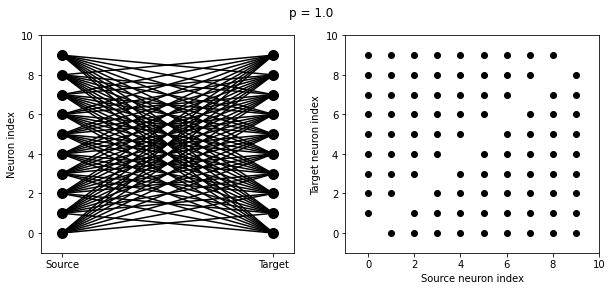

In [8]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

for p in [0.1, 0.5, 1.0]:
    S = Synapses(G, G)
    S.connect(condition='i!=j', p=p)
    visualise_connectivity(S)
    suptitle('p = '+str(p));

### 那改变神经元链接的条件，会发生什么变化呢

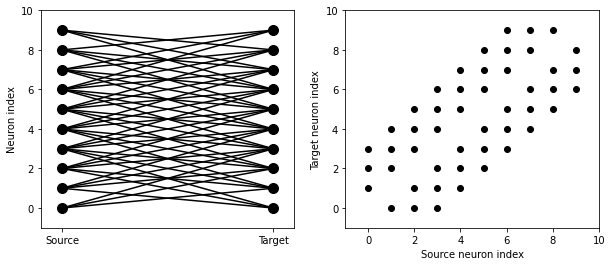

In [9]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

S = Synapses(G, G)
S.connect(condition='abs(i-j)<4 and i!=j')   #这里改变了，概率默认为1.0
visualise_connectivity(S)

### 尝试用其他连接条件

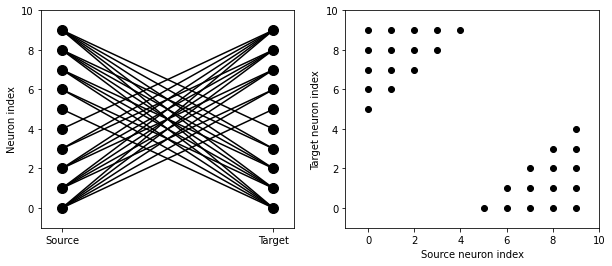

In [10]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

S = Synapses(G, G)
S.connect(condition='abs(i-j)>4 and i!=j')   #这里改变了，概率默认为1.0
visualise_connectivity(S)

### 使用生成器来创建突触
- #### 指定连接的最通用方法试试用生成器法

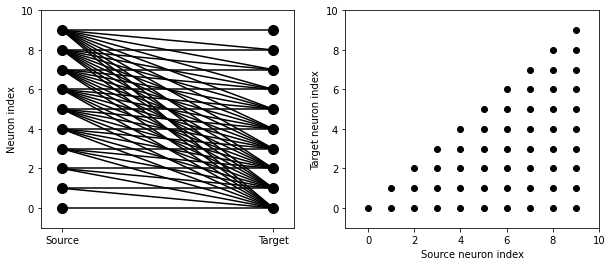

In [21]:
#例如将神经元 i 连接到所有具有 0<=j<=i 的神经元 j
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

S = Synapses(G, G)
S.connect(j='k for k in range(0, i+1)')   #这里改变了，概率默认为1.0
visualise_connectivity(S)

### skip_if_invalid用于避免边界处的错误（例如，不要尝试将索引为 1 的神经元连接到索引为 -2 的神经元）

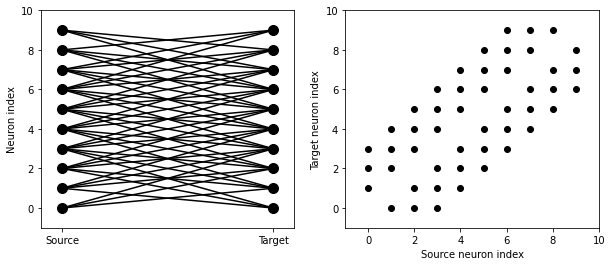

In [11]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

S = Synapses(G, G)
S.connect(j='k for k in range(i-3, i+4) if i!=k', skip_if_invalid=True)
visualise_connectivity(S)

### 一对一
- #### 您可以指定从 i 到任何函数 f(i) 的映射，例如，提供 1 对 1 连接的最简单方法是

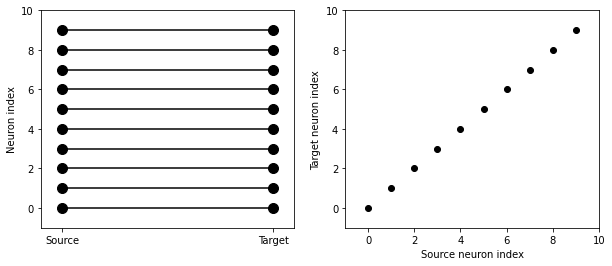

In [12]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

S = Synapses(G, G)
S.connect(j='i')
visualise_connectivity(S)

### 使用字符串指定权重值之类的操作。让我们看一个示例，其中我们为每个神经元分配一个空间位置并具有依赖于距离的连接函数。我们通过标记的大小来可视化突触的权重

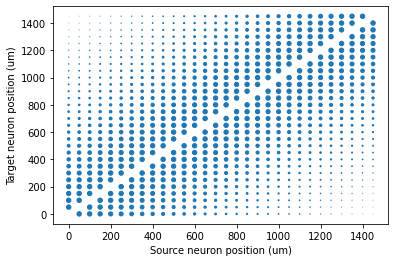

In [19]:
start_scope()

N = 30
neuron_spacing = 50*umetre
width = N/4.0*neuron_spacing

# Neuron has one variable x, its position
G = NeuronGroup(N, 'x : metre')
G.x = 'i*neuron_spacing'

# All synapses are connected (excluding self-connections)
S = Synapses(G, G, 'w : 1')
S.connect(condition='i!=j')
# Weight varies with distance
S.w = 'exp(-(x_pre-x_post)**2/(2*width**2))'   # 1, 更改该权重公式
#S.w = 'exp(-(x_pre / x_pre)'    # 2

scatter(S.x_pre/um, S.x_post/um, S.w*20)
xlabel('Source neuron position (um)')
ylabel('Target neuron position (um)');

### 上面介绍的都是简单的突触模型
## 而现实中的脉冲神经网络模型需要用到更复杂的突触模型：STDP
- ### STDP：尖峰时间依赖可塑性
- ### STP：短期可塑性

### 突触权重 w 的变化是所有突触前尖峰时间的总和  和突触后尖峰时间  某种功能的 这些尖峰时间的差异。一个常用的函数 W是\begin{split}W(\Delta t) = \begin{cases}
A_{pre} e^{-\Delta t/\tau_{pre}} & \Delta t>0 \\
A_{post} e^{\Delta t/\tau_{post}} & \Delta t<0
\end{cases}\end{split}

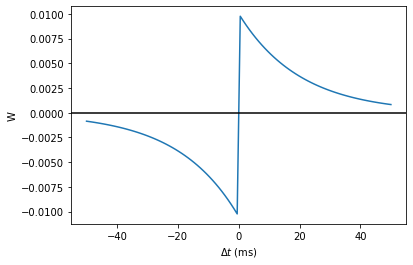

In [20]:
tau_pre = tau_post = 20*ms
A_pre = 0.01
A_post = -A_pre*1.05
delta_t = linspace(-50, 50, 100)*ms
W = where(delta_t>0, A_pre*exp(-delta_t/tau_pre), A_post*exp(delta_t/tau_post))
plot(delta_t/ms, W)
xlabel(r'$\Delta t$ (ms)')
ylabel('W')
axhline(0, ls='-', c='k');

### 直接使用上面的方程模拟它会非常低效，因为我们必须对所有尖峰对进行求和。这在生理上也是不现实的，因为神经元无法记住它之前的所有尖峰时间。事实证明，有一种更有效、生理上更合理的方法可以达到同样的效果

定义了两个新变量  和  它们是突触前和突触后活动的“痕迹”，由微分方程控制：


\begin{split}\begin{aligned}
\tau_{pre}\frac{\mathrm{d}}{\mathrm{d}t} a_{pre} &= -a_{pre}\\
\tau_{post}\frac{\mathrm{d}}{\mathrm{d}t} a_{post} &= -a_{post}
\end{aligned}\end{split}
 
当突触前尖峰发生时，根据规则更新突触前迹线并修改权重：
\begin{split}\begin{aligned}
a_{pre} &\rightarrow a_{pre}+A_{pre}\\
w &\rightarrow w+a_{post}
\end{aligned}\end{split}
 
 
当突触后尖峰发生时：

\begin{split}\begin{aligned}
a_{post} &\rightarrow a_{post}+A_{post}\\
w &\rightarrow w+a_{pre}
\end{aligned}\end{split}
#### 在突触前尖峰到突触后尖峰之间这段时间所有变量的行为：

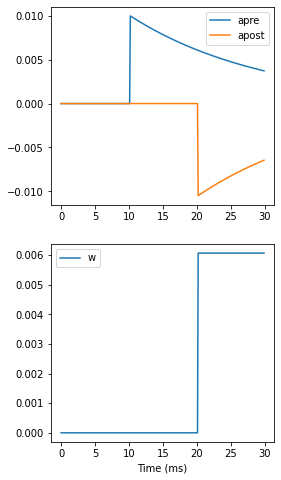

In [22]:
start_scope()

taupre = taupost = 20*ms
wmax = 0.01
Apre = 0.01
Apost = -Apre*taupre/taupost*1.05

G = NeuronGroup(2, 'v:1', threshold='t>(1+i)*10*ms', refractory=100*ms)

S = Synapses(G, G,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (clock-driven)
             dapost/dt = -apost/taupost : 1 (clock-driven)
             ''',
             on_pre='''
             v_post += w  
             apre += Apre
             w = clip(w+apost, 0, wmax)
             ''',
             on_post='''
             apost += Apost
             w = clip(w+apre, 0, wmax)
             ''', method='linear')
S.connect(i=0, j=1)
M = StateMonitor(S, ['w', 'apre', 'apost'], record=True)

run(30*ms)

figure(figsize=(4, 8))
subplot(211)
plot(M.t/ms, M.apre[0], label='apre')
plot(M.t/ms, M.apost[0], label='apost')
legend()
subplot(212)
plot(M.t/ms, M.w[0], label='w')
legend(loc='best')
xlabel('Time (ms)');

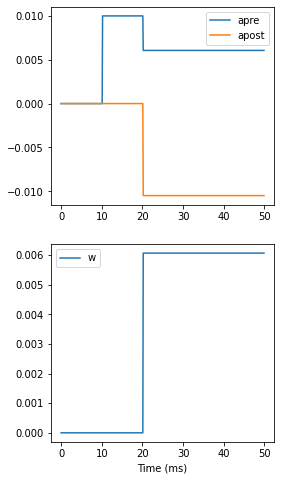

In [24]:
# (event-driven)替换(clock-driven)

start_scope()

taupre = taupost = 20*ms
wmax = 0.01
Apre = 0.01
Apost = -Apre*taupre/taupost*1.05

G = NeuronGroup(2, 'v:1', threshold='t>(1+i)*10*ms', refractory=100*ms)

S = Synapses(G, G,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             v_post += w
             apre += Apre
             w = clip(w+apost, 0, wmax)
             ''',
             on_post='''
             apost += Apost
             w = clip(w+apre, 0, wmax)
             ''', method='linear')
S.connect(i=0, j=1)
M = StateMonitor(S, ['w', 'apre', 'apost'], record=True)

run(50*ms)

figure(figsize=(4, 8))
subplot(211)
plot(M.t/ms, M.apre[0], label='apre')
plot(M.t/ms, M.apost[0], label='apost')
legend()
subplot(212)
plot(M.t/ms, M.w[0], label='w')
legend(loc='best')
xlabel('Time (ms)');

## 验证这个方程是否与原始方程等效

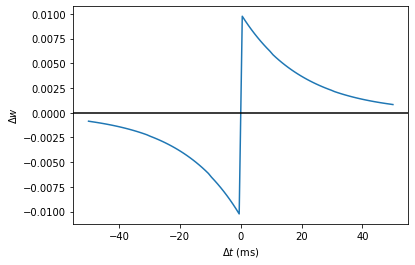

In [25]:
start_scope()

taupre = taupost = 20*ms
Apre = 0.01
Apost = -Apre*taupre/taupost*1.05
tmax = 50*ms
N = 100

# Presynaptic neurons G spike at times from 0 to tmax
# Postsynaptic neurons G spike at times from tmax to 0
# So difference in spike times will vary from -tmax to +tmax
G = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
H = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
G.tspike = 'i*tmax/(N-1)'
H.tspike = '(N-1-i)*tmax/(N-1)'

S = Synapses(G, H,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(j='i')

run(tmax+1*ms)

plot((H.tspike-G.tspike)/ms, S.w)
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k');